# ``phytorch.cosmology``

This notebook demonstrates the various functionalities of ``phytorch.cosmology``, which are mainly related to cosmographic distance calculations.

We first import the various external modules we'll need. Setting the default datatype to `double` will prevent some numerical issues which otherwise might look like bugs :)

In [1]:
import torch
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.dpi': 96}


torch.set_default_dtype(torch.double)

## Instantiation and basics

To initialise a cosmology class, one needs to first select the concrete cosmological model (ΛCDM, wCDM, etc.) and a driver (analytic, numerical integration, etc.) which performs the cosmographic calculaitons. If cosmography is not your thing, there is an "abstract" driver under `phytorch.cosmology.drivers.abstract`, which we'll use to demonstrate basic operations.

Cosmologies are initialised by giving values for the required parameters as **keyword-only** arguments:

In [2]:
from phytorch.cosmology.drivers import abstract

c = abstract.LambdaCDMR(Om0=0.31, Ode0=0.68, Or0=1e-4)

We can now visualise how the various relative densities evolve:

In [3]:
z = torch.logspace(-2, 5, 71)

Om = c.Om(z)
Ode = c.Ode(z)
Or = c.Or(z)
Ok = c.Ok(z)

The returned values are tensors, which can be plotted (behind the scenes):

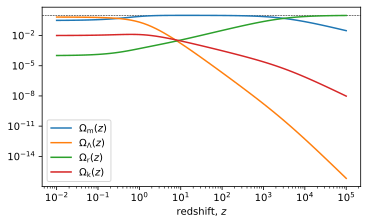

In [4]:
fig = plt.figure(figsize=(5, 3))
plt.axhline(1, ls='dashed', c='black', lw=0.5)
plt.loglog(z, Om, label=r'$\Omega_{\mathrm{m}}(z)$')
plt.loglog(z, Ode, label=r'$\Omega_{\Lambda}(z)$')
plt.loglog(z, Or, label=r'$\Omega_{\mathrm{r}}(z)$')
plt.loglog(z, Ok, label=r'$\Omega_{\mathrm{k}}(z)$')
plt.xlabel('redshift, $z$')
plt.legend();

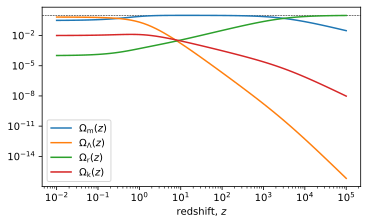

In [5]:
fig

The parameters can be tensors as well and can be safely modified after instantiation:

In [6]:
c.Om0 = torch.tensor([0, 0.3, 1])

All calculations broadcast as you'd expect. For example, we can calculate the dimensionless Hubble parameter $E(z, \Omega_{\mathrm{m} 0}, \Omega_{\lambda 0}, \Omega_{\mathrm{r} 0})$ for the three different matter densities over a range of redshifts, one can do

In [7]:
E = c.efunc(z.unsqueeze(-1))
E.shape

torch.Size([71, 3])

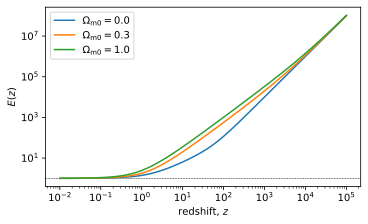

In [8]:
fig = plt.figure(figsize=(5, 3))
plt.axhline(1, ls='dashed', lw=0.5, color='k')
for _E, _Om0 in zip(E.unbind(-1), c.Om0):
    plt.loglog(z, _E, label=r'$\Omega_{\mathrm{m} 0} = ' f'{_Om0.item():.1f}' '$')
plt.xlabel('redshift, $z$')
plt.ylabel('$E(z)$')
plt.legend();

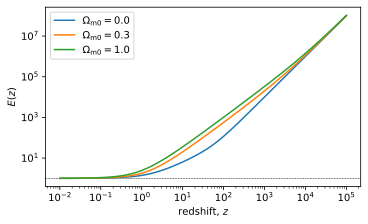

In [9]:
fig

### Unitful quantities

One can also calculate unitful quantities. In cosmology, units are set by the Hubble parameter $H_0$, which by default is taken to be $100 \, \mathrm{km}/\mathrm{s}/\mathrm{Mpc}$. 

## Distance calculations

In [10]:
from phytorch.cosmology.drivers.analytic import LambdaCDM

c = LambdaCDM(Om0=0.31, Ode0=0.68)

z = torch.logspace(-3, 5, 81)

dc = c.comoving_distance_dimless(z)
dl = c.luminosity_distance_dimless(z)
da = c.angular_diameter_distance_dimless(z)

Plot behind the scenes:

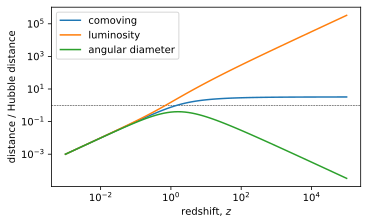

In [11]:
fig = plt.figure(figsize=(5, 3))
plt.axhline(1, ls='dashed', c='black', lw=0.5)
plt.loglog(z, dc, label='comoving')
plt.loglog(z, dl, label='luminosity')
plt.loglog(z, da, label='angular diameter')
plt.xlabel('redshift, $z$')
plt.ylabel('distance / Hubble distance')
plt.legend();

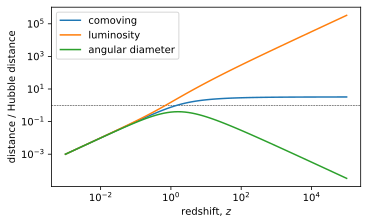

In [12]:
fig

#### Distance units and unitful distances

### More cosmological models

## Gradients
## Module